# Projet Machine learning

## Import des librairies

In [283]:
import pandas as pd
import seaborn as sns
import matplotlib as mp
import matplotlib.pyplot as plt
import numpy as np

## Dataset Overview

### Import

In [124]:
## encoding UTF-8 is not real UTF-8
circuits = pd.read_csv('data/circuits.csv', encoding = "ISO-8859-1", engine='python')
constructorResults = pd.read_csv('data/constructorResults.csv', encoding = "ISO-8859-1", engine='python') 
constructors = pd.read_csv('data/constructors.csv', encoding = "ISO-8859-1", engine='python') 
constructorStandings = pd.read_csv('data/constructorStandings.csv', encoding = "ISO-8859-1", engine='python') 
drivers = pd.read_csv('data/drivers.csv', encoding = "ISO-8859-1", engine='python') 
driverStandings = pd.read_csv('data/driverStandings.csv', encoding = "ISO-8859-1", engine='python')
lapTimes = pd.read_csv('data/lapTimes.csv', encoding = "ISO-8859-1", engine='python') 
pitStops = pd.read_csv('data/pitStops.csv', encoding = "ISO-8859-1", engine='python') 
qualifying = pd.read_csv('data/qualifying.csv')
races = pd.read_csv('data/races.csv') 
results = pd.read_csv('data/results.csv', encoding = "ISO-8859-1", engine='python')
seasons = pd.read_csv('data/seasons.csv', encoding = "ISO-8859-1", engine='python') 
status = pd.read_csv('data/status.csv', encoding = "ISO-8859-1", engine='python')

### Traitement

In [125]:
lapTimes.head()

,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006
2,841,20,3,1,1:32.713,92713
3,841,20,4,1,1:32.803,92803
4,841,20,5,1,1:32.342,92342


### Fonction

### Overview

In [126]:
races.head()

,raceId,year,round,circuitId,name,date,time,url
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...


In [127]:
races.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997 entries, 0 to 996
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   raceId     997 non-null    int64 
 1   year       997 non-null    int64 
 2   round      997 non-null    int64 
 3   circuitId  997 non-null    int64 
 4   name       997 non-null    object
 5   date       997 non-null    object
 6   time       266 non-null    object
 7   url        997 non-null    object
dtypes: int64(4), object(4)
memory usage: 62.4+ KB


## Pour la saison 2011

In [128]:
races_2011 = races.query('year == 2011')
races_2011

,raceId,year,round,circuitId,name,date,time,url
839,841,2011,1,1,Australian Grand Prix,2011-03-27,06:00:00,http://en.wikipedia.org/wiki/2011_Australian_G...
840,842,2011,2,2,Malaysian Grand Prix,2011-04-10,08:00:00,http://en.wikipedia.org/wiki/2011_Malaysian_Gr...
841,843,2011,3,17,Chinese Grand Prix,2011-04-17,07:00:00,http://en.wikipedia.org/wiki/2011_Chinese_Gran...
842,844,2011,4,5,Turkish Grand Prix,2011-05-08,12:00:00,http://en.wikipedia.org/wiki/2011_Turkish_Gran...
843,845,2011,5,4,Spanish Grand Prix,2011-05-22,12:00:00,http://en.wikipedia.org/wiki/2011_Spanish_Gran...
844,846,2011,6,6,Monaco Grand Prix,2011-05-29,12:00:00,http://en.wikipedia.org/wiki/2011_Monaco_Grand...
845,847,2011,7,7,Canadian Grand Prix,2011-06-12,17:00:00,http://en.wikipedia.org/wiki/2011_Canadian_Gra...
846,848,2011,8,12,European Grand Prix,2011-06-26,12:00:00,http://en.wikipedia.org/wiki/2011_European_Gra...
847,849,2011,9,9,British Grand Prix,2011-07-10,12:00:00,http://en.wikipedia.org/wiki/2011_British_Gran...
848,850,2011,10,20,German Grand Prix,2011-07-24,12:00:00,http://en.wikipedia.org/wiki/2011_German_Grand...


In [129]:
races_lapTimes_2011 = pd.merge(races_2011,lapTimes,on = "raceId",how='left')
races_lapTimes_drivers_2011 = pd.merge(races_lapTimes_2011,drivers,on = "driverId",how='left')
races_lapTimes_drivers_2011.head()

,raceId,year,round,circuitId,name,date,time_x,url_x,driverId,lap,...,time_y,milliseconds,driverRef,number,code,forename,surname,dob,nationality,url_y
0,841,2011,1,1,Australian Grand Prix,2011-03-27,06:00:00,http://en.wikipedia.org/wiki/2011_Australian_G...,20,1,...,1:38.109,98109,vettel,5.0,VET,Sebastian,Vettel,03/07/1987,German,http://en.wikipedia.org/wiki/Sebastian_Vettel
1,841,2011,1,1,Australian Grand Prix,2011-03-27,06:00:00,http://en.wikipedia.org/wiki/2011_Australian_G...,20,2,...,1:33.006,93006,vettel,5.0,VET,Sebastian,Vettel,03/07/1987,German,http://en.wikipedia.org/wiki/Sebastian_Vettel
2,841,2011,1,1,Australian Grand Prix,2011-03-27,06:00:00,http://en.wikipedia.org/wiki/2011_Australian_G...,20,3,...,1:32.713,92713,vettel,5.0,VET,Sebastian,Vettel,03/07/1987,German,http://en.wikipedia.org/wiki/Sebastian_Vettel
3,841,2011,1,1,Australian Grand Prix,2011-03-27,06:00:00,http://en.wikipedia.org/wiki/2011_Australian_G...,20,4,...,1:32.803,92803,vettel,5.0,VET,Sebastian,Vettel,03/07/1987,German,http://en.wikipedia.org/wiki/Sebastian_Vettel
4,841,2011,1,1,Australian Grand Prix,2011-03-27,06:00:00,http://en.wikipedia.org/wiki/2011_Australian_G...,20,5,...,1:32.342,92342,vettel,5.0,VET,Sebastian,Vettel,03/07/1987,German,http://en.wikipedia.org/wiki/Sebastian_Vettel


### Pour vettel, le grand prix de monaco

In [130]:
races_lapTimes_driversVettel_2011 = races_lapTimes_drivers_2011.query('name == "Monaco Grand Prix" and driverRef == "vettel"')

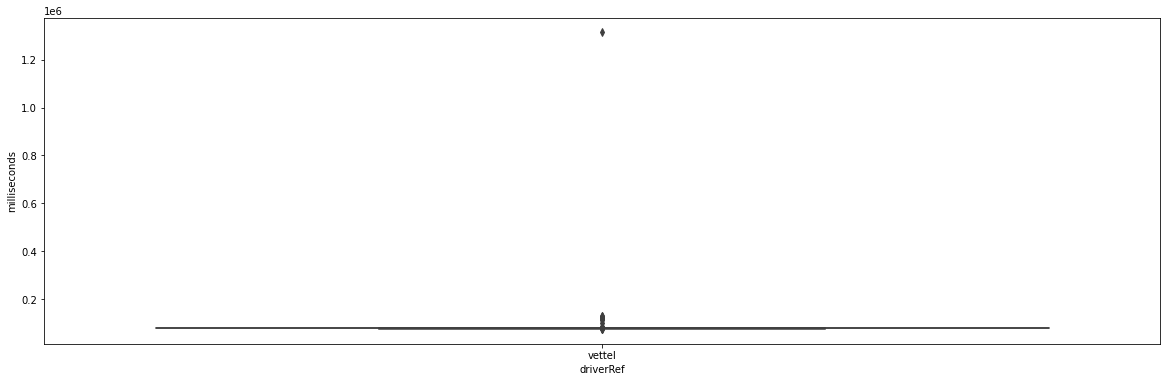

In [131]:
g = sns.boxplot(x="driverRef", y="milliseconds", data=races_lapTimes_driversVettel_2011)
fig = mp.pyplot.gcf()
fig.set_size_inches(20,6)

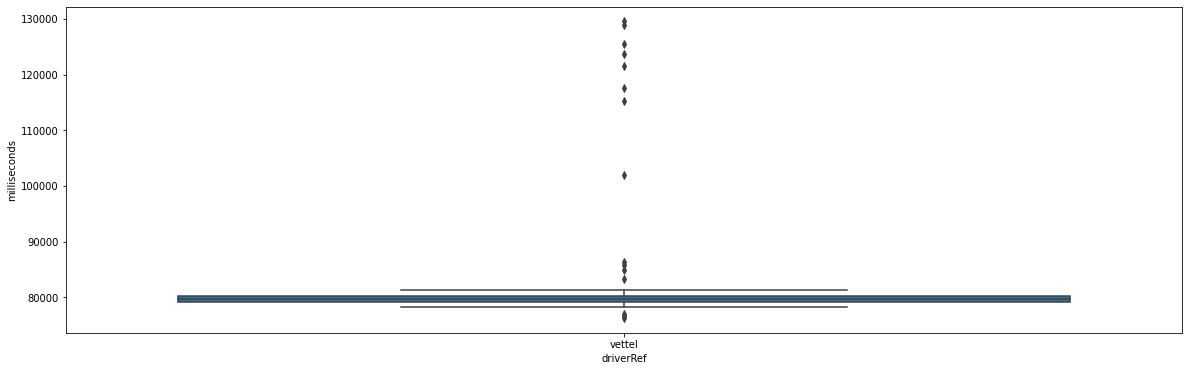

In [132]:
g = sns.boxplot(x="driverRef", y="milliseconds", data=races_lapTimes_driversVettel_2011.query('lap != 72'))
fig = mp.pyplot.gcf()
fig.set_size_inches(20,6)

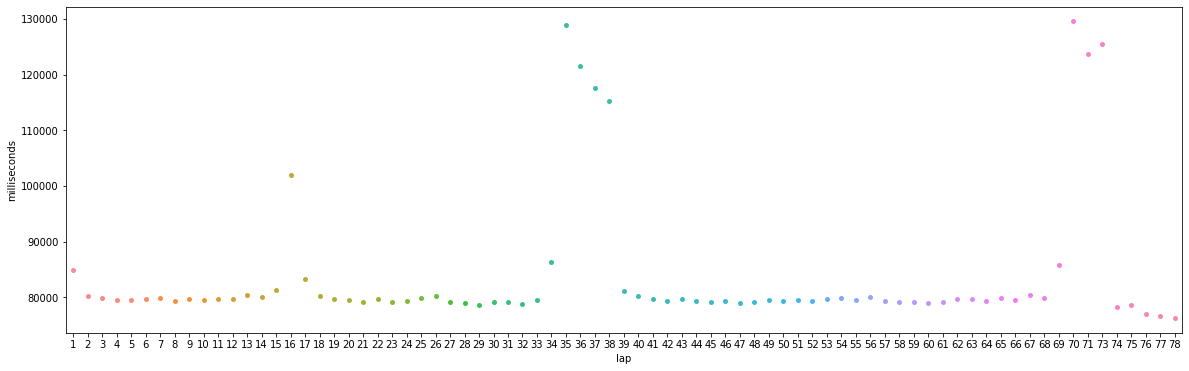

In [133]:
rax = sns.swarmplot(data=races_lapTimes_driversVettel_2011.query('lap != 72'),x="lap",y="milliseconds")
fig = mp.pyplot.gcf()
fig.set_size_inches(20,6)

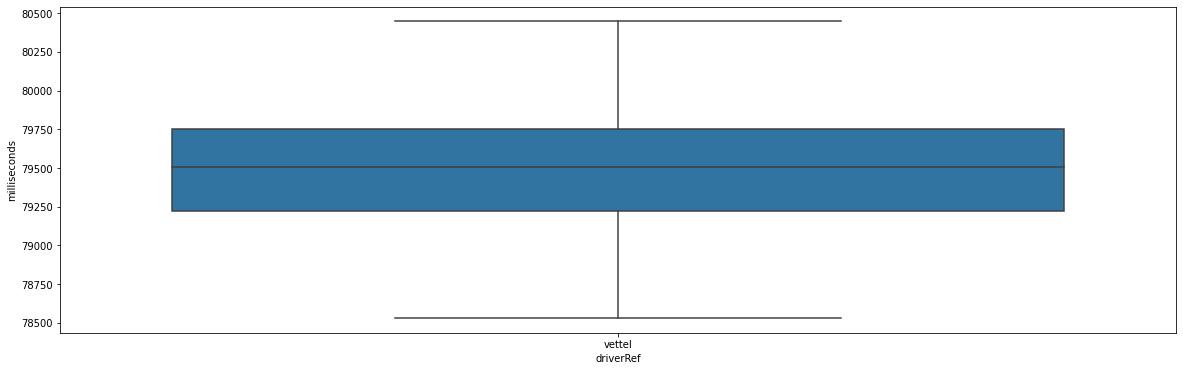

In [134]:
g = sns.boxplot(x="driverRef", y="milliseconds", data=races_lapTimes_driversVettel_2011.query('lap != 72 and milliseconds<81000 and milliseconds>78400'))
fig = mp.pyplot.gcf()
fig.set_size_inches(20,6)

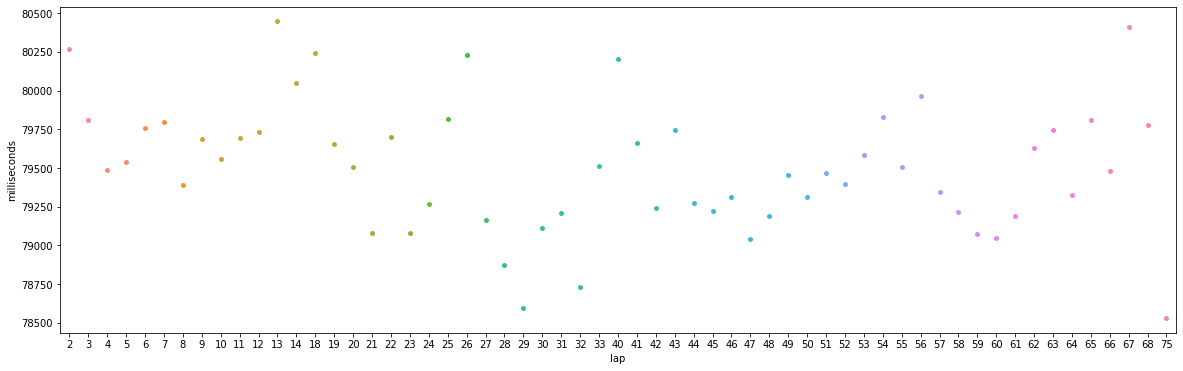

In [138]:
rax = sns.swarmplot(data=races_lapTimes_driversVettel_2011.query('lap != 72 and milliseconds<81000 and milliseconds>78400'),x="lap",y="milliseconds")
fig = mp.pyplot.gcf()
fig.set_size_inches(20,6)

In [160]:
pd.to_timedelta(races_lapTimes_driversVettel_2011.query('lap != 72 and milliseconds<81000 and milliseconds>78400')['milliseconds'].mean(),unit='ms')

Timedelta('0 days 00:01:19.508355932')

### Etat de l'art au grand prix d'italie

In [167]:
races_driverStandings_2011 = pd.merge(races_2011,driverStandings,on = "raceId",how='left')
races_driverStandings_drivers_2011 = pd.merge(races_driverStandings_2011,drivers,on = "driverId",how='left')

In [169]:
races_driverStandings_drivers_2011.head()

,raceId,year,round,circuitId,name,date,time,url_x,driverStandingsId,driverId,...,positionText,wins,driverRef,number,code,forename,surname,dob,nationality,url_y
0,841,2011,1,1,Australian Grand Prix,2011-03-27,06:00:00,http://en.wikipedia.org/wiki/2011_Australian_G...,64709,813,...,20,0,maldonado,13.0,MAL,Pastor,Maldonado,09/03/1985,Venezuelan,http://en.wikipedia.org/wiki/Pastor_Maldonado
1,841,2011,1,1,Australian Grand Prix,2011-03-27,06:00:00,http://en.wikipedia.org/wiki/2011_Australian_G...,64708,30,...,19,0,michael_schumacher,NaN,MSC,Michael,Schumacher,03/01/1969,German,http://en.wikipedia.org/wiki/Michael_Schumacher
2,841,2011,1,1,Australian Grand Prix,2011-03-27,06:00:00,http://en.wikipedia.org/wiki/2011_Australian_G...,64707,5,...,18,0,kovalainen,NaN,KOV,Heikki,Kovalainen,19/10/1981,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen
3,841,2011,1,1,Australian Grand Prix,2011-03-27,06:00:00,http://en.wikipedia.org/wiki/2011_Australian_G...,64706,3,...,17,0,rosberg,6.0,ROS,Nico,Rosberg,27/06/1985,German,http://en.wikipedia.org/wiki/Nico_Rosberg
4,841,2011,1,1,Australian Grand Prix,2011-03-27,06:00:00,http://en.wikipedia.org/wiki/2011_Australian_G...,64705,22,...,16,0,barrichello,NaN,BAR,Rubens,Barrichello,23/05/1972,Brazilian,http://en.wikipedia.org/wiki/Rubens_Barrichello


In [171]:
races_driverStandings_drivers_2011.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 494 entries, 0 to 493
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   raceId             494 non-null    int64  
 1   year               494 non-null    int64  
 2   round              494 non-null    int64  
 3   circuitId          494 non-null    int64  
 4   name               494 non-null    object 
 5   date               494 non-null    object 
 6   time               494 non-null    object 
 7   url_x              494 non-null    object 
 8   driverStandingsId  494 non-null    int64  
 9   driverId           494 non-null    int64  
 10  points             494 non-null    float64
 11  position           494 non-null    int64  
 12  positionText       494 non-null    object 
 13  wins               494 non-null    int64  
 14  driverRef          494 non-null    object 
 15  number             199 non-null    float64
 16  code               494 non

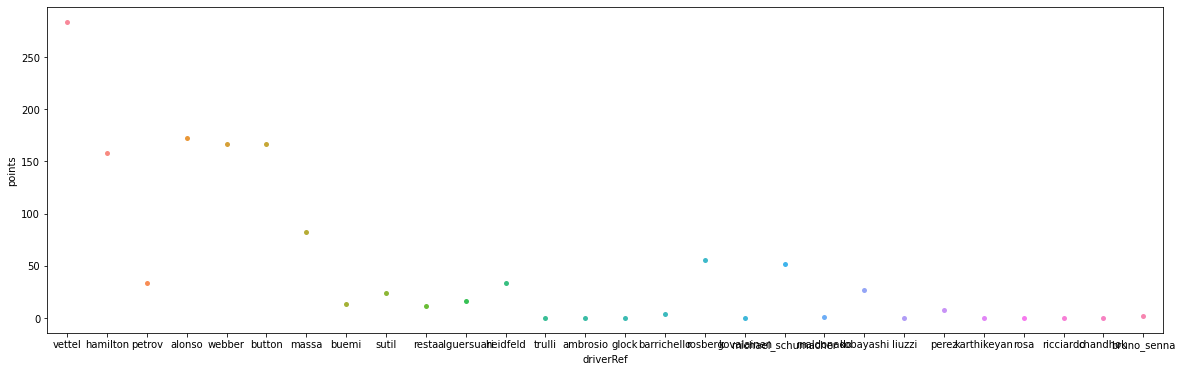

In [179]:
rax = sns.swarmplot(data=races_driverStandings_drivers_2011.query('name == "Italian Grand Prix"'),x="driverRef",y="points")
fig = mp.pyplot.gcf()
fig.set_size_inches(20,6)

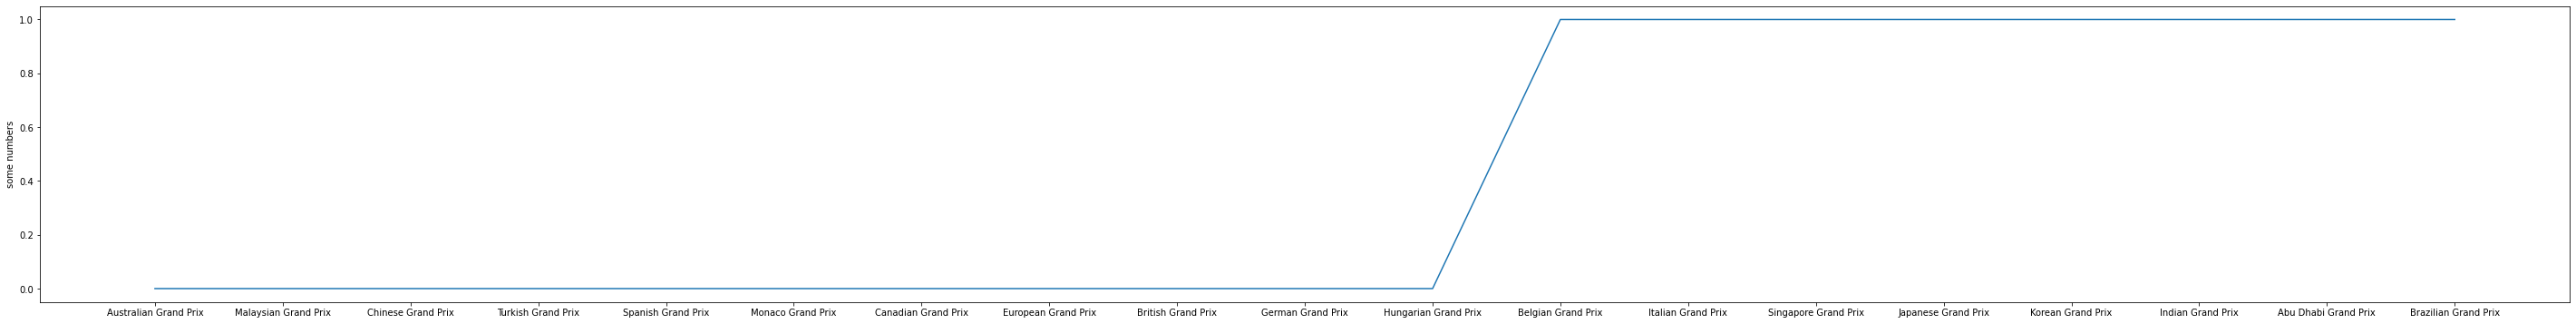

In [202]:
aa = races_driverStandings_drivers_2011.query('driverRef == "maldonado" and ')[["points","name"]]

plt.plot(aa["name"],aa["points"])
plt.ylabel('some numbers')
fig = mp.pyplot.gcf()
fig.set_size_inches(50,6)
plt.show()

In [206]:
races_driverStandings_drivers_2011.query('driverRef == "rosberg"')[["points","name"]]

,points,name
3,0.0,Australian Grand Prix
36,0.0,Malaysian Grand Prix
60,10.0,Chinese Grand Prix
84,20.0,Turkish Grand Prix
108,26.0,Spanish Grand Prix
132,26.0,Monaco Grand Prix
156,26.0,Canadian Grand Prix
181,32.0,European Grand Prix
206,40.0,British Grand Prix
232,46.0,German Grand Prix


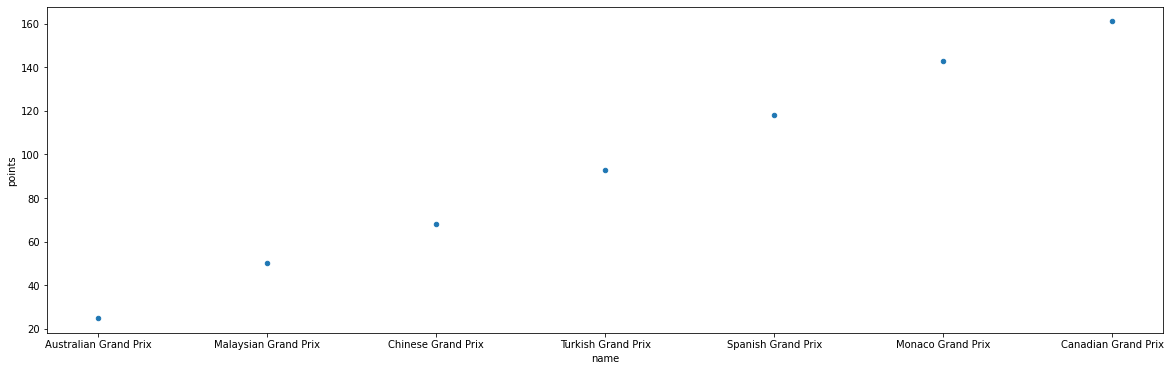

In [207]:
races_driverStandings_drivers_2011.query('driverRef == "vettel" and raceId < 848')[["points","name"]].plot.scatter(x='name', y='points')
fig = mp.pyplot.gcf()
fig.set_size_inches(20,6)

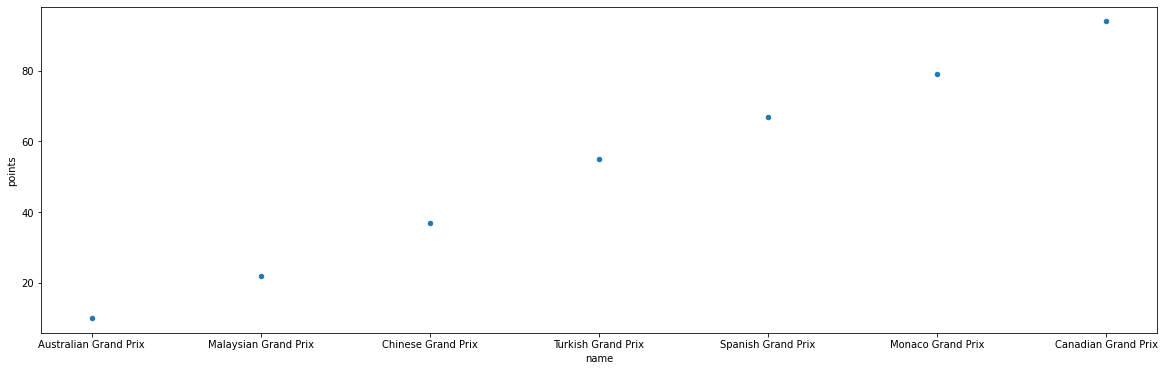

In [210]:
races_driverStandings_drivers_2011.query('driverRef == "webber" and raceId < 848')[["points","name"]].plot.scatter(x='name', y='points')
fig = mp.pyplot.gcf()
fig.set_size_inches(20,6)

## Les meilleurs arrêts au stand par équipe

In [251]:
constructors.head()

,constructorId,constructorRef,name,nationality,url,Unnamed: 5
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,NaN
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber,NaN
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...,NaN
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_F1,NaN
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso,NaN


In [249]:
results.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22.0,1,1.0,1,1,10.0,58,34:50.6,5690616.0,39.0,2.0,01:27.5,218.3,1
1,2,18,2,2,3.0,5,2.0,2,2,8.0,58,5.478,5696094.0,41.0,3.0,01:27.7,217.586,1
2,3,18,3,3,7.0,7,3.0,3,3,6.0,58,8.163,5698779.0,41.0,5.0,01:28.1,216.719,1
3,4,18,4,4,5.0,11,4.0,4,4,5.0,58,17.181,5707797.0,58.0,7.0,01:28.6,215.464,1
4,5,18,5,1,23.0,3,5.0,5,5,4.0,58,18.014,5708630.0,43.0,1.0,01:27.4,218.385,1


In [244]:
races.head()

,raceId,year,round,circuitId,name,date,time,url
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...


In [245]:
pitStops.head()

,raceId,driverId,stop,lap,time,duration,milliseconds
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842


In [254]:
constructors_results = pd.merge(constructors[['constructorId','name']],results[['constructorId','driverId','raceId']],on = "constructorId",how='right')
constructors_results.head()

,constructorId,name,driverId,raceId
0,1,McLaren,1,18
1,1,McLaren,5,18
2,1,McLaren,5,19
3,1,McLaren,1,19
4,1,McLaren,5,20


In [257]:
constructors_results_races = pd.merge(constructors_results,races.query('year == 2011')['raceId'],on = "raceId",how='inner')
constructors_results_races.head()

,constructorId,name,driverId,raceId
0,1,McLaren,1,841
1,1,McLaren,18,841
2,3,Williams,22,841
3,3,Williams,813,841
4,4,Renault,808,841


In [267]:
pitStops_constructors_results_races = pd.merge(pitStops,constructors_results_races,on = ["raceId","driverId"],how='inner')
pitStops_constructors_results_races

,raceId,driverId,stop,lap,time,duration,milliseconds,constructorId,name
0,841,153,1,1,17:05:23,26.898,26898,5,Toro Rosso
1,841,153,2,17,17:31:06,24.463,24463,5,Toro Rosso
2,841,153,3,35,17:59:45,26.348,26348,5,Toro Rosso
3,841,30,1,1,17:05:52,25.021,25021,131,Mercedes
4,841,30,2,17,17:32:08,23.988,23988,131,Mercedes
...,...,...,...,...,...,...,...,...,...
1109,859,24,1,21,14:32:06,22.666,22666,164,HRT
1110,859,24,2,45,15:05:02,22.996,22996,164,HRT
1111,859,10,1,21,14:32:08,22.452,22452,166,Virgin
1112,859,15,1,22,14:33:08,22.616,22616,205,Lotus


In [354]:
pitStops_constructors_results_races["seconds"] = pitStops_constructors_results_races["milliseconds"]/1000
pitStops_constructors_results_races["seconds"].head()

0    26.898
1    24.463
2    26.348
3    25.021
4    23.988
Name: seconds, dtype: float64

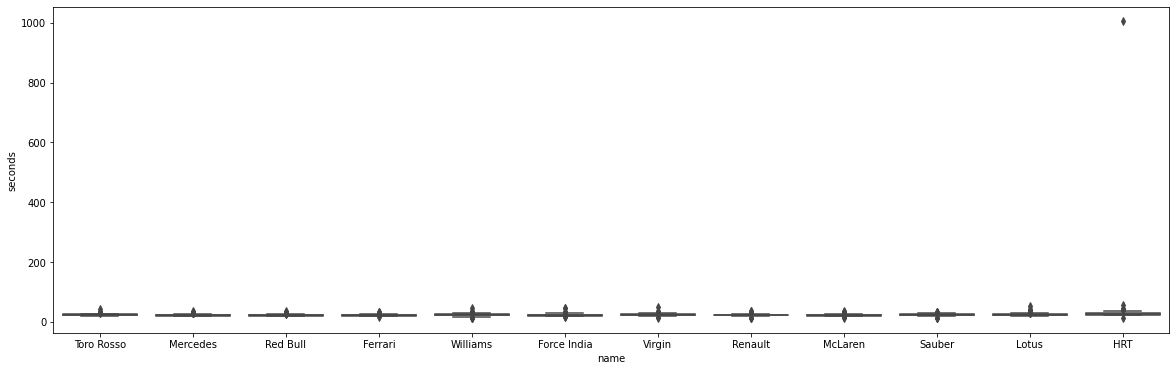

In [358]:
g = sns.boxplot(x="name", y="seconds" ,data=pitStops_constructors_results_races)
fig = mp.pyplot.gcf()
fig.set_size_inches(20,6)

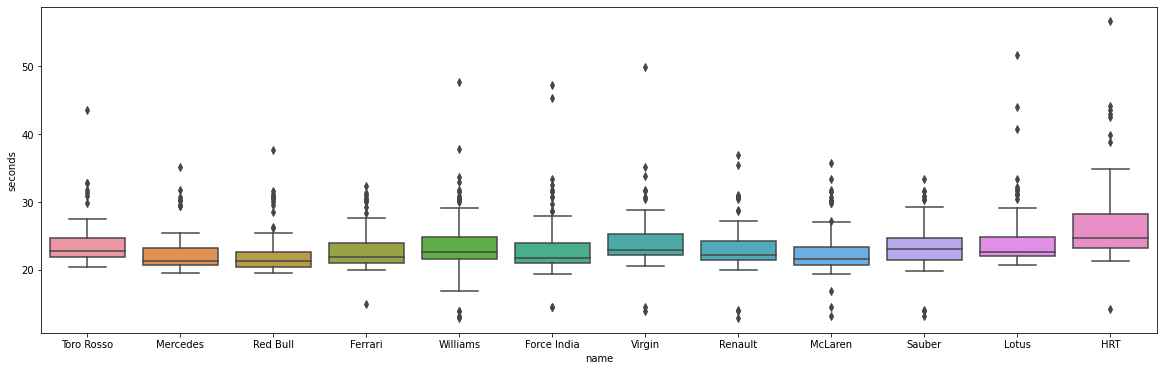

In [359]:
g = sns.boxplot(x="name", y="seconds" ,data=pitStops_constructors_results_races.query("seconds < 60"))
fig = mp.pyplot.gcf()
fig.set_size_inches(20,6)

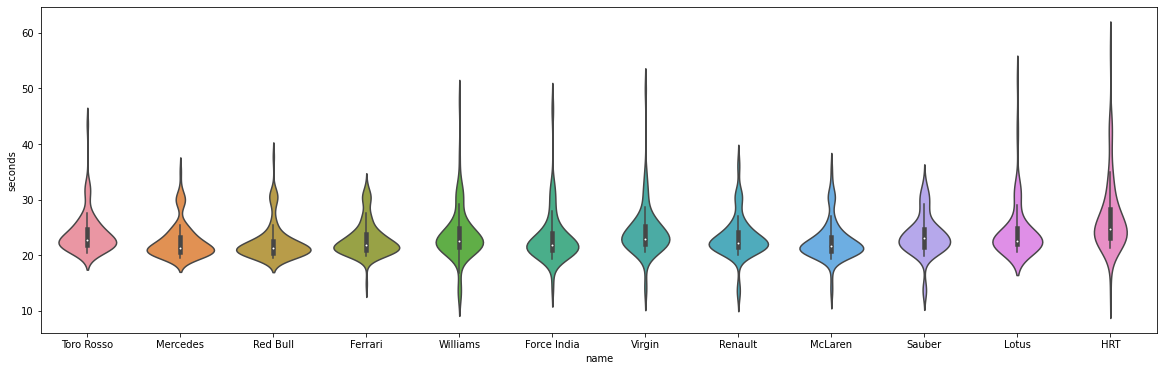

In [364]:
g = sns.violinplot(x="name", y="seconds", data=pitStops_constructors_results_races.query("seconds < 60"))
fig = mp.pyplot.gcf()
fig.set_size_inches(20,6)

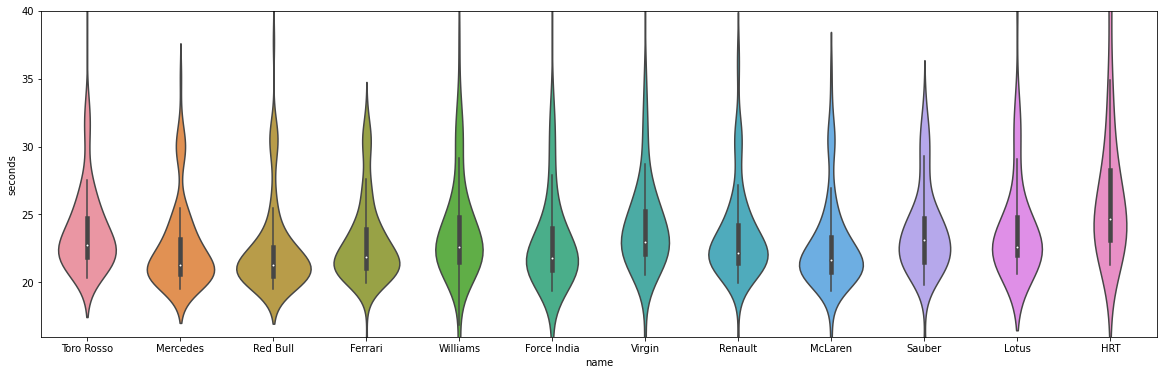

In [387]:
g = sns.violinplot(x="name", y="seconds", data=pitStops_constructors_results_races.query("seconds < 60"))
fig = mp.pyplot.gcf()
g.set(ylim=(16, 40))
fig.set_size_inches(20,6)

In [372]:
pitStops_constructors_results_races.query("name == 'Williams' and seconds<30")

,raceId,driverId,stop,lap,time,duration,milliseconds,constructorId,name,aa,seconds
14,841,22,1,13,17:24:29,23.643,23643,3,Williams,00:00:23.643000,23.643
16,841,22,3,28,17:49:07,16.892,16892,3,Williams,00:00:16.892000,16.892
17,841,22,4,40,18:08:03,26.309,26309,3,Williams,00:00:26.309000,26.309
49,842,22,2,17,16:35:41,24.502,24502,3,Williams,00:00:24.502000,24.502
114,843,813,1,10,15:21:35,23.160,23160,3,Williams,00:00:23.160000,23.160
...,...,...,...,...,...,...,...,...,...,...,...
1052,858,813,2,30,17:58:49,12.897,12897,3,Williams,00:00:12.897000,12.897
1080,859,22,1,16,14:24:50,21.537,21537,3,Williams,00:00:21.537000,21.537
1081,859,22,2,34,14:48:56,22.590,22590,3,Williams,00:00:22.590000,22.590
1082,859,22,3,53,15:14:17,21.638,21638,3,Williams,00:00:21.638000,21.638
